In [244]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [245]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [246]:
class Request:
    def __init__(self, line):
        # TODO DO PARSING HERE        
        myIP = line.split('.')
        self.ip = ""
        myData = ""
        self.page=""
        #It's done to have an IP ---------------DONE????????????
        for elem in myIP:
            if elem.find('[') == -1:
                self.ip += elem + '.'
            else:
                self.ip += elem[:elem.find('[')]
                myData += elem[elem.find('[')+13:elem.find('[')+21]
                self.page += elem[elem.find('GET ')+4:len(elem)] + '.html'
                break
                
        # convert hours + minutes + seconds -> total number of seconds-------------------DONE???????
        self.time = int(myData[0:2]) * 3600 + int(myData[3:5]) * 60 + int(myData[7:])
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [247]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173      11:13:09 -> AddProduct.html
176.247.135.49      11:18:07 -> Shop.html
176.247.135.49      11:19:05 -> AddProduct.html
176.247.135.49      11:29:05 -> Summary.html
69.84.30.199      11:43:09 -> Shop.html
69.84.30.199      11:45:06 -> AddProduct.html
57.116.45.120      11:46:05 -> AddProduct.html
69.84.30.199      11:50:06 -> Summary.html
69.84.30.199      11:52:08 -> Payment.html
26.19.183.202      11:53:01 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [248]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]


In [249]:
# 3.1 the number of sessions (should be 1000 :)

allSessions = []
threshold = 301        # min na sesje - roznica z pierwszym w sesji
one_page = 61          #threshold for one page - roznica z ostatnim w biezacej sesji
added = False


for request in reqs:
    added = False
    if len(allSessions) != 0 :
        for currentSession in allSessions:
            if request.time - currentSession.startTime <= threshold:
                if request.time - currentSession.requests[-1].time <= one_page:
                    for myRequest in currentSession.requests:
                        if request.page == myRequest.page or request.page in LINKS[PAGES.index(myRequest.page)]:   
                            currentSession.requests.append(request)
                            currentSession.stopTime = request.time
                            added = True 
                            break
                            
    if added == False or len(allSessions) == 0:                    
        currentSession = Session()
        currentSession.requests.append(request)
        currentSession.startTime = request.time
        currentSession.stopTime = request.time
        allSessions.append(currentSession)

In [250]:
print(len(allSessions))
#for session in allSessions:
    #print(session.stopTime)

999


In [264]:
# 3.2 the number of users
users = []
computers = []   #dwa tylko po to, żeby łatwiej było posortować i sprawdzić, computers przyda się potem

for l in range(len(reqs)): 
    if reqs[l].ip not in users:
        computer = Computer()
        computer.ip = reqs[l].ip 
        computers.append(computer)
        users.append(reqs[l].ip)
        
users.sort()
print(len(users))

391


In [252]:
# 3.3) the average number of sessions per one user
averagePerUser = len(allSessions) / len(users)
averagePerUser

2.554987212276215

[]

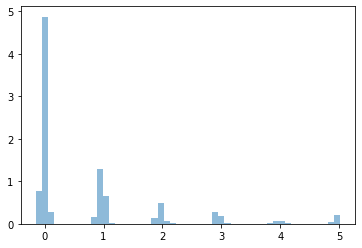

In [253]:
# 3.4) use the distribution plot to visualize the sessions' lengths (minutes);
#plot distribution
data = [(session.stopTime - session.startTime)/60 for session in allSessions]
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)
plt.plot()

[]

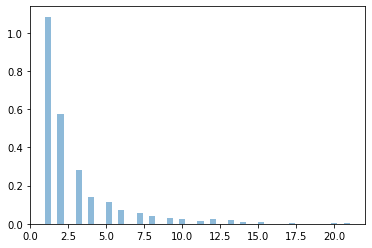

In [254]:
# 3.5) use the distribution plot to visualize the sessions' lengths (the number of requests)
data = [len(session.requests) for session in allSessions]
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)
plt.plot()

[]

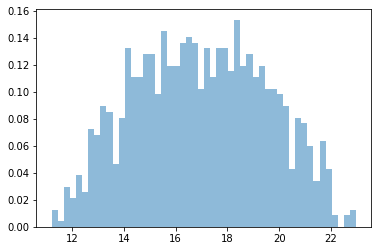

In [255]:
# 3.6) use the distribution plot to visualize sessions' starting times (hours).
data = [session.startTime / 3600 for session in allSessions]
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)
plt.plot()

([<matplotlib.axis.XTick at 0x1dab1499828>,
 <a list of 6 Text xticklabel objects>)

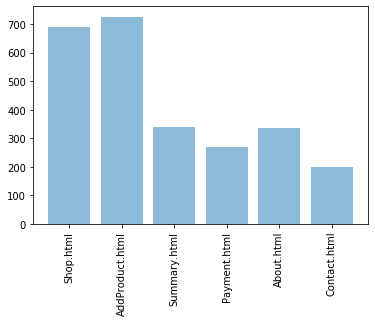

In [256]:
# 3.7) which web page is the most common entry point?; 
#for each page plot the number of times it has been an entry page

data = np.zeros((len(PAGES),), dtype=int)
pages = PAGES
y_pos = np.arange((len(PAGES)))

for request in reqs:
    data[pages.index(request.page)] += 1
    
    
x_axis = np.arange(len(pages))
plt.bar(x_axis, data, align='center', alpha=0.5)
plt.xticks(y_pos, pages, rotation=90)

999


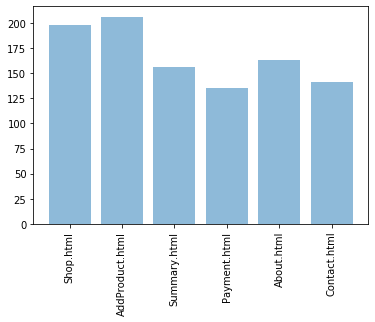

In [262]:
# 3.8) which web page is the most common departure point?; 
#for each page plot the number of times the user stopped a session while being on this page,

data = np.zeros((len(PAGES),), dtype=int)
pages = PAGES
y_pos = np.arange((len(PAGES)))

for request in reqs:
    for session in allSessions:
        if session.requests[-1] == request:
            data[pages.index(request.page)] += 1
    
    
x_axis = np.arange(len(pages))
plt.bar(x_axis, data, align='center', alpha=0.5)
plt.xticks(y_pos, pages, rotation=90)

In [276]:
# 3.9) for each page plot the average time the user stayed on this page

time = np.zeros((len(PAGES),), dtype=int)
numberOfRequest = np.zeros((len(PAGES),), dtype=int)
pages = PAGES
y_pos = np.arange((len(PAGES)))

for user in computers:
    for session in allSessions:
        for sessionRequest in session.requests:
            if sessionRequest.ip == user.ip and session not in user.sessions:
                user.sessions.append(session)
                break

                
#for computer in computers:
    #for session in sessions:
print(computers[0].sessions)        

#ta lista na koncu jest tym czego potrzebujemy - jak do niej dotrzec???
#jak posortowac ja wzgledem czasu???

SESSION
40389
40389
156.15.13.173      11:13:09 -> AddProduct.html
SESSION
54427
54602
76.217.110.232      15:07:07 -> AddProduct.html
137.164.98.24      15:08:00 -> AddProduct.html
156.15.13.173      15:09:01 -> AddProduct.html
240.46.1.193      15:09:03 -> AddProduct.html
247.183.199.42      15:10:02 -> AddProduct.html
SESSION
54487
54601
215.35.20.54      15:08:07 -> Shop.html
156.15.13.173      15:08:06 -> Shop.html
240.46.1.193      15:08:06 -> Shop.html
11.176.205.62      15:09:04 -> Shop.html
23.253.32.224      15:10:01 -> Shop.html
41.79.145.133      15:10:00 -> Shop.html
60.155.227.170      15:10:01 -> Shop.html
SESSION
55147
55147
156.15.13.173      15:19:07 -> Summary.html
SESSION
55204
55265
137.164.98.24      15:20:04 -> Payment.html
156.15.13.173      15:21:05 -> Payment.html
SESSION
71582
71582
156.15.13.173      19:53:02 -> AddProduct.html
143.209.211.142      19:53:02 -> AddProduct.html
SESSION
72007
72007
156.15.13.173      20:00:07 -> About.html
[  AddProduct.html   

In [259]:
# 3.10) print the fist 10 sessions (paths).
for index in range(0, 10):
    print(allSessions[index])

SESSION
40389
40389
156.15.13.173      11:13:09 -> AddProduct.html
  AddProduct.html    11:13:09

SESSION
40687
40687
176.247.135.49      11:18:07 -> Shop.html
  Shop.html    11:18:07

SESSION
40745
40745
176.247.135.49      11:19:05 -> AddProduct.html
  AddProduct.html    11:19:05

SESSION
41345
41345
176.247.135.49      11:29:05 -> Summary.html
  Summary.html    11:29:05

SESSION
42189
42189
69.84.30.199      11:43:09 -> Shop.html
  Shop.html    11:43:09

SESSION
42306
42365
69.84.30.199      11:45:06 -> AddProduct.html
57.116.45.120      11:46:05 -> AddProduct.html
  AddProduct.html    11:45:06
  AddProduct.html    11:46:05

SESSION
42606
42606
69.84.30.199      11:50:06 -> Summary.html
  Summary.html    11:50:06

SESSION
42728
42728
69.84.30.199      11:52:08 -> Payment.html
  Payment.html    11:52:08

SESSION
42781
42781
26.19.183.202      11:53:01 -> AddProduct.html
  AddProduct.html    11:53:01

SESSION
42785
42785
57.116.45.120      11:53:05 -> Summary.html
  Summary.html    11